# **What is Hierarchical Clustering?**

Hierarchical clustering is a unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.
In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the **dendrogram**.


### There are mainly two types of hierarchical clustering:

*  Agglomerative hierarchical clustering


*  Divisive Hierarchical clustering

# Agglomerative hierarchical clustering

It's a Bottom to Up approach clustering technique. In this initially we assign each points to be a individual clusters.
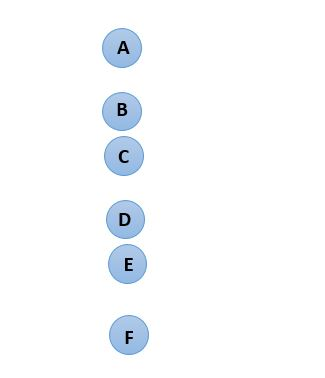

Then, at each iteration, we marge the closest pair of clusters and repeat this step until onlt a single cluster is left. Since at each step we merge the closest clusters. So, it's also known as **additive hierarchical clustering.**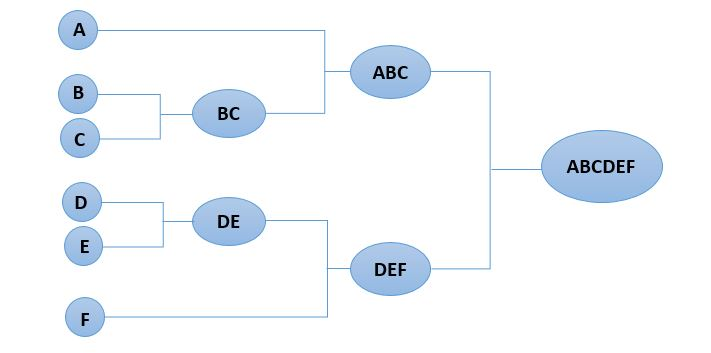

# Divisive Hierarchical clustering
It's a Top to Down Approach clustering technique.It work in opposite way. Instead of starting with 'n' clusters, it start with a single cluster Containing all points.

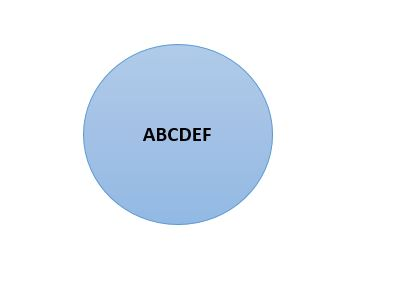

At each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point.We are splitting (or dividing) the clusters at each step, hence the name divisive hierarchical clustering. 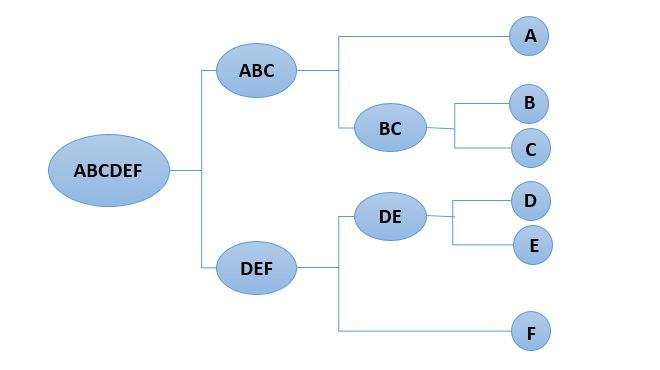

# **Proximity matrix**

Proximity matrix is a square matrix of shape n X n where n is a number of obsevations. It contains the distance of each points from each other points. We use Euclidean distance formula to calculate the distance.



# **Steps to Perform Hierarchical Clustring**

 To understanding the working process of Hierarchical Clustring, Let's take an sample of 5 Students.
 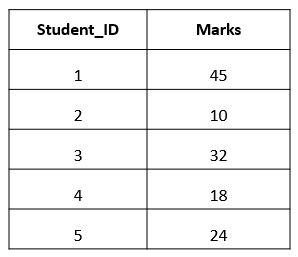

### **<u>Step1:</u>** First, we assign all points as a individual clusters.
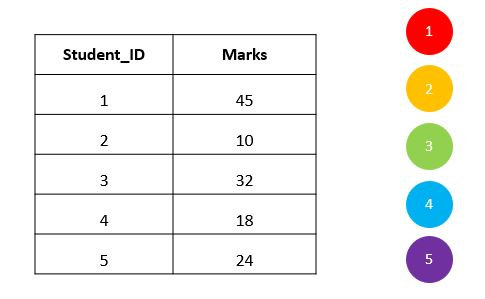

### <u>Step2:</u> We create proximity matrix of the given dataset.

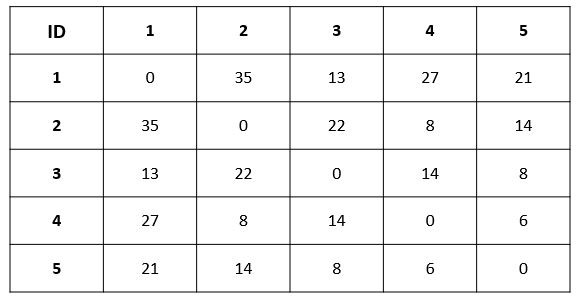

### **<u>Step3 :</u>** We merge the points that have smallest distance.
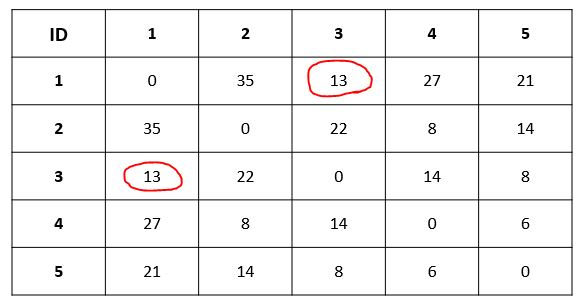

Here, is an updated clusters and we update the proximity matrix:
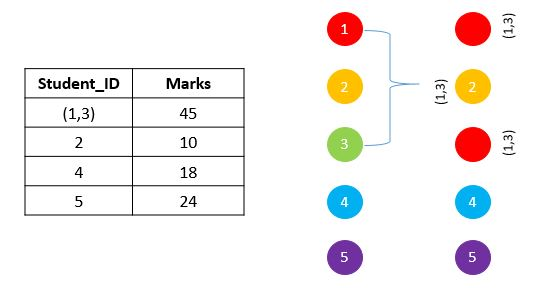

In updated proximity matrix we have taken the maximum of the two marks (45, 32) to replace the marks for (1,2) cluster.

**Now, we will again calculate the proximity matrix for these clusters:**

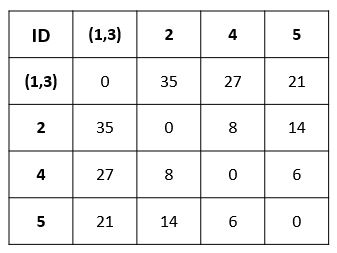

### <u>Step4:</u> We will repeat step 3 until only a single cluster is left.

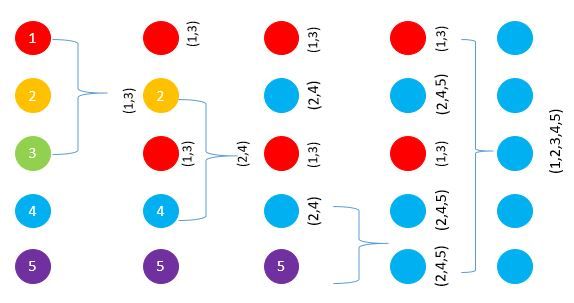

# **Linkages**

Linkage is a method of finding distance between two points. There are four Linkages in Hierarchical Clustering:
* Single Linkage
* Complete Linkage
* Average Linkage
* Ward Linkage

### <u>Single Linkage :</u>
In Single Linkage, the distance between two clusters is measured from the closest point in both clusters.
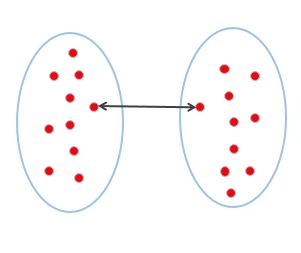

### <u>Complete Linkage : </u>
In Complete Linkage, the distance between two clusters is measured from the farest point in both clusters.
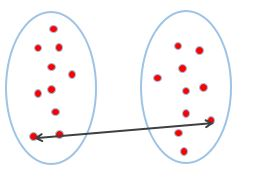

### <u>Average Linkage : </u> 
In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

 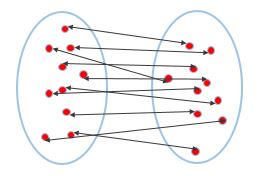
 
 ### <u>Ward Linkage : </u> 
In ward Linkage, the distance is calculated in the same way as Average linkage, the different is that it calculate the sum of the square of the distances from each points in one cluster from outer cluster's points.
    


**Linkages and Patters Detected ::** https://scikit-learn.org/stable/modules/clustering.html

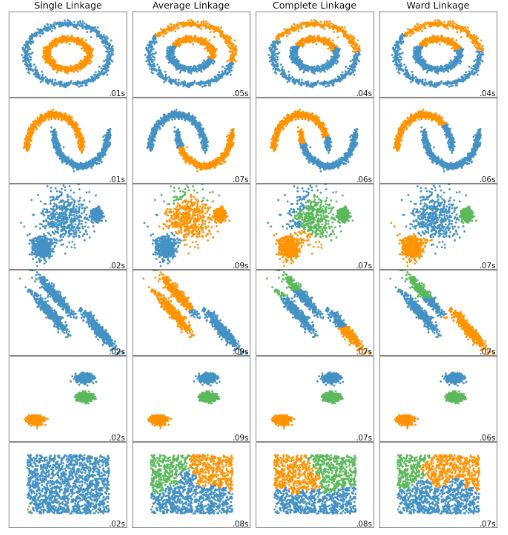

# **Implementation of Hierarchical Clustering on Mall_Customers Dataset**

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

## Dataset Inspection

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### We take only two Features (Annual Income and Spending Score) to classify customer type.

In [12]:
X = dataset.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

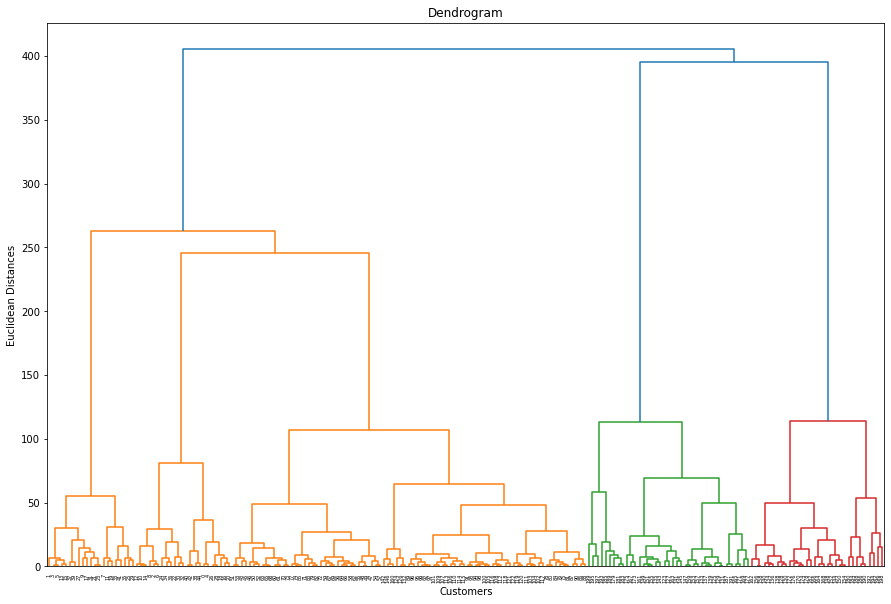

In [18]:
# Using Dendogram to find the optimal number of clusters
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

### <u>Dendrogram</u>
Dendrogram is a graphical representation of Hierarchical Clustering. More the vertical length of line in dendogram, more the distance between the clusters.
dendogram is help in finding the number of clusters. We set a threshold distance and draw a horizontal line.Then the number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

In [10]:
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(200, c='r', linestyle='--')
plt.show()

NameError: name 'hc' is not defined

Here's the number of Cluster is (n_clusters) = 5

### Using Agglomerative hierarchical clustering Approch 

In [12]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc_Agg = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', 
                                 linkage = 'ward')
y_hc = hc_Agg.fit_predict(X)

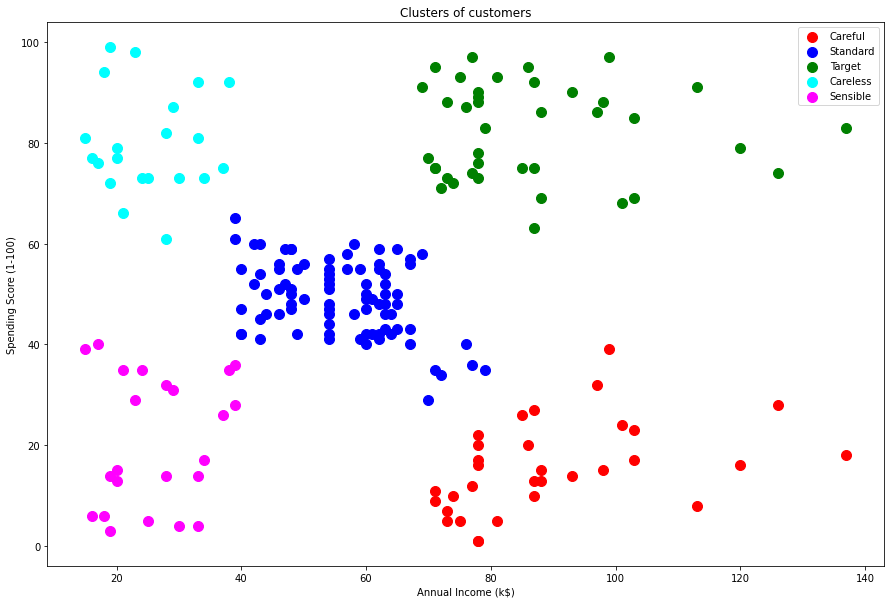

In [13]:
# Visualizing the clusters
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### In 90% Cases Result of Both hierarchical clustering technique is same.